## Context
Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.


1. [Libraries](#0)
2. [Data Content](#1)
3. [Reading Data and Quick Analysis](#2)
4. [Model Training](#3)
5. [Outlier Detection and Re-Modelling](#4)
6. [Hyperparameter Tuning](#5)
7. [RF modelling with PCA (UnSuccess)](#6) 
8. [Shapley Additive Explanations (SHAP) and Re-Modelling](#7)

<a id= "0"></a>

## Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import plotly.express as px

<a id= "1"></a>
## Data Content

1. **pH value**:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from **6.5 to 8.5**. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. **Hardness**:
Hardness is mainly caused by **calcium and magnesium salts**. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. **Solids (Total dissolved solids - TDS)**:
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. **Chloramines**:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to **4 milligrams per liter** (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. **Sulfate**:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from **3 to 30** mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. **Conductivity**:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded **400 μS/cm**.

7. **Organic_carbon**:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < **2 mg/L** as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. **Trihalomethanes**:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to **80 ppm** is considered safe in drinking water.

9. **Turbidity**:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of **5.00 NTU**.

10. **Potability**:
Indicates if water is safe for human consumption where **1 means Potable and 0 means Not potable**.

<a id= "2"></a>

## Reading Data and Quick Analysis

In [2]:
water_data = pd.read_csv('water_potability.csv')
df = water_data.copy()
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [4]:
# table of features value ranges

value_ranges = pd.concat([df.min(), df.max()], axis=1)
value_ranges.columns = ['min', 'max']

value_ranges

,min,max
ph,0.000000,14.000000
Hardness,47.432000,323.124000
Solids,320.942611,61227.196008
Chloramines,0.352000,13.127000
Sulfate,129.000000,481.030642
Conductivity,181.483754,753.342620
Organic_carbon,2.200000,28.300000
Trihalomethanes,0.738000,124.000000
Turbidity,1.450000,6.739000
Potability,0.000000,1.000000


In [5]:
df.loc[(df["ph"] > 10) | (df["ph"] < 4), ["ph", "Potability"]]

,ph,Potability
1,3.716080,0
6,10.223862,0
9,11.180284,0
23,3.902476,0
26,3.445062,0
...,...,...
3233,10.485604,1
3246,10.667364,1
3249,10.808157,1
3261,3.629922,1


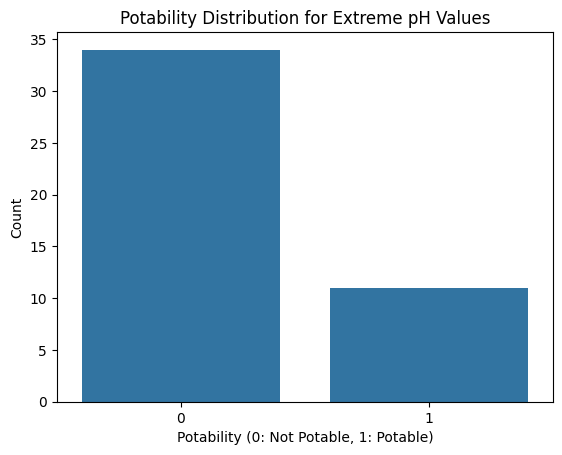

In [6]:
subset = df.loc[(df["ph"] > 11) | (df["ph"] < 3), ["ph", "Potability"]]
sns.countplot(data=subset, x="Potability")
plt.title("Potability Distribution for Extreme pH Values")
plt.xlabel("Potability (0: Not Potable, 1: Potable)")
plt.ylabel("Count")
plt.show()

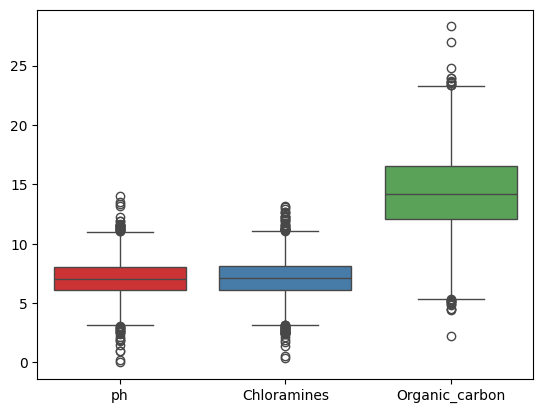

In [7]:
feature_list1 = ["ph", "Chloramines", "Organic_carbon"]

sns.boxplot(data = df.loc[:, feature_list1], orient="v", palette="Set1");

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [9]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [10]:
d = pd.DataFrame(df["Potability"].value_counts())
fig = px.pie(d, values = "count", names = ["Not Potable", "Potable"], hole = 0.35, opacity = 0.8,
            labels = {"label" :"Potability","Potability":"Number of Samples"})
fig.update_layout(title = dict(text = "Pie Chart of Potability Feature"))
fig.update_traces(textposition = "outside", textinfo = "percent+label")
fig.show()

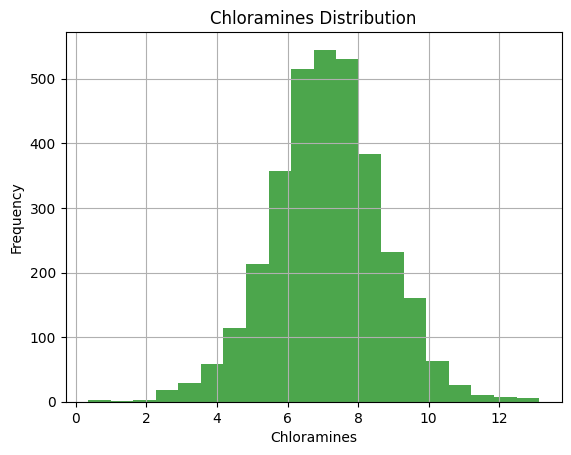

In [11]:
df.Chloramines.hist(bins = 20, color = "green", alpha = 0.7)
plt.title("Chloramines Distribution")
plt.xlabel("Chloramines")
plt.ylabel("Frequency");

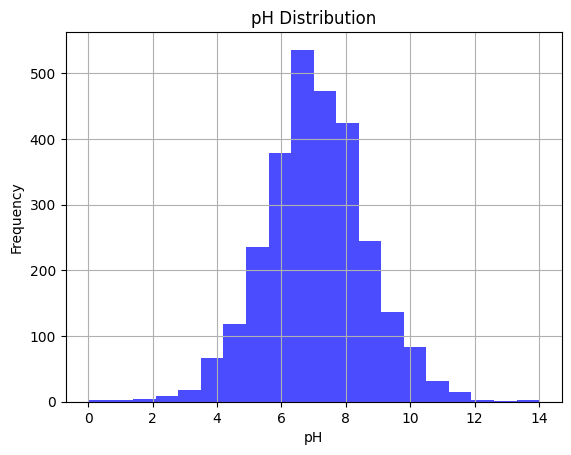

In [12]:
df.ph.hist(bins = 20, color = "blue", alpha = 0.7)
plt.title("pH Distribution")
plt.xlabel("pH")
plt.ylabel("Frequency");

In [13]:
# fill with mean missing values
df["Sulfate"].fillna(df["Sulfate"].mean(), inplace=True)
df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean(), inplace=True)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11284\3644309924.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11284\3644309924.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [14]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate              0
Conductivity         0
Organic_carbon       0
Trihalomethanes      0
Turbidity            0
Potability           0
dtype: int64

In [15]:
# Analyzing missing ph values potability
ph_nan_df = water_data[water_data['ph'].isna()][['ph', 'Potability']]
pd.DataFrame(ph_nan_df['Potability'].value_counts())

,count
Potability,
0,314
1,177


In [ ]:
df['PH_missing'] = df['ph'].isna().astype(int)
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,PH_missing
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,1
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0,1
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0,0


In [17]:
df["ph"].fillna(df["ph"].mean(), inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11284\2349941834.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [18]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
PH_missing         0
dtype: int64

<a id= "3"></a>
MODEL TRAINING

The model which was trained often predicts incorrect for potability value "1"

In [19]:
X = df.drop("Potability", axis=1)
y = df["Potability"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2293, 10)
X_test shape: (983, 10)
y_train shape: (2293,)
y_test shape: (983,)


In [21]:
RFC = RandomForestClassifier(random_state=42)
RFC_model = RFC.fit(X_train, y_train)


In [22]:
y_pred = RFC_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6744659206510681


In [23]:
rfc_params = {
    'n_estimators': [500],
    'max_depth': [None],
    'min_samples_split': [5],
    'min_samples_leaf': [1]
}
    #'max_depth': [None, 5, 7, 10],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4, 5, 10]

In [24]:
RFC = RandomForestClassifier(class_weight='balanced', random_state=42)
grid_model = GridSearchCV(estimator=RFC, param_grid=rfc_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [25]:
grid_model.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 500}

In [52]:
rfc_tuned = RandomForestClassifier(n_estimators=grid_model.best_params_['n_estimators'],
                                   max_depth=10,
                                   min_samples_split=grid_model.best_params_['min_samples_split'],
                                   min_samples_leaf=grid_model.best_params_['min_samples_leaf'],
                                   random_state=42,
                                   class_weight="balanced").fit(X_train, y_train)

In [53]:
y_pred = rfc_tuned.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.688708036622584
              precision    recall  f1-score   support

           0       0.71      0.85      0.77       617
           1       0.62      0.42      0.50       366

    accuracy                           0.69       983
   macro avg       0.67      0.63      0.64       983
weighted avg       0.68      0.69      0.67       983



In [54]:
confusion_matrix(y_test, y_pred)

array([[524,  93],
       [213, 153]], dtype=int64)

In [29]:
rfc_tuned.predict_proba(X_test)[:10,1]

array([0.30397117, 0.30428267, 0.32827232, 0.40366057, 0.43899219,
       0.66110388, 0.56814541, 0.40871207, 0.60403908, 0.28879884])

In [30]:
y_probs = rfc_tuned.predict_proba(X_test)[:,1]

y_pred_thresh = (y_probs > 0.45).astype(int)

print(classification_report(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76       617
           1       0.58      0.48      0.52       366

    accuracy                           0.68       983
   macro avg       0.65      0.64      0.64       983
weighted avg       0.67      0.68      0.67       983



In [31]:
pd.DataFrame(rfc_tuned.feature_importances_, index=X_train.columns, columns=['importance']).sort_values(by='importance', ascending=False)

,importance
ph,0.126035
Sulfate,0.121388
Hardness,0.120248
Solids,0.115392
Chloramines,0.112909
Organic_carbon,0.103238
Conductivity,0.099576
Trihalomethanes,0.096758
Turbidity,0.096327
PH_missing,0.008129


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11284\1174912494.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Feature Importances from Random Forest Classifier')

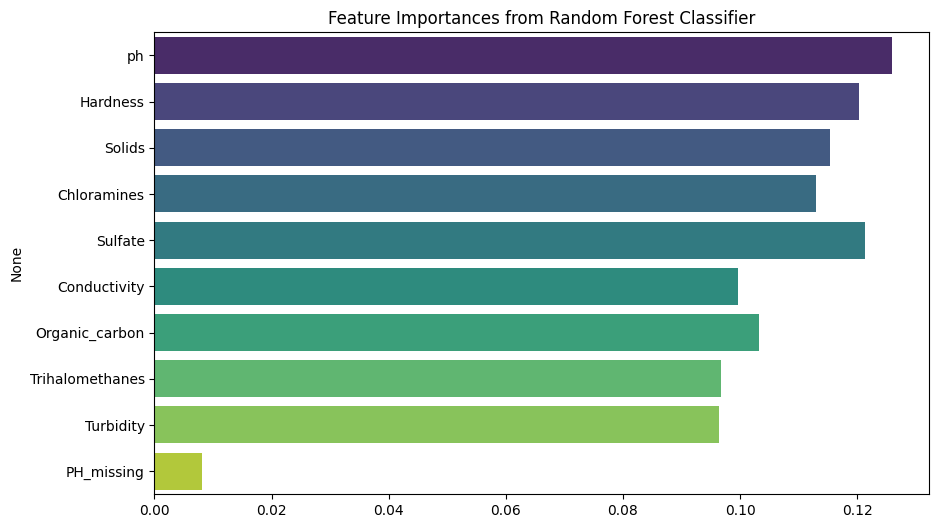

In [32]:
pd.DataFrame(rfc_tuned.feature_importances_, index=X_train.columns, columns=['importance']).sort_values(by='importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=rfc_tuned.feature_importances_, y=X_train.columns, palette='viridis')
plt.title('Feature Importances from Random Forest Classifier')

<a id="4"></a>
## Outlier Detection and Re-Modelling

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11284\1261681078.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




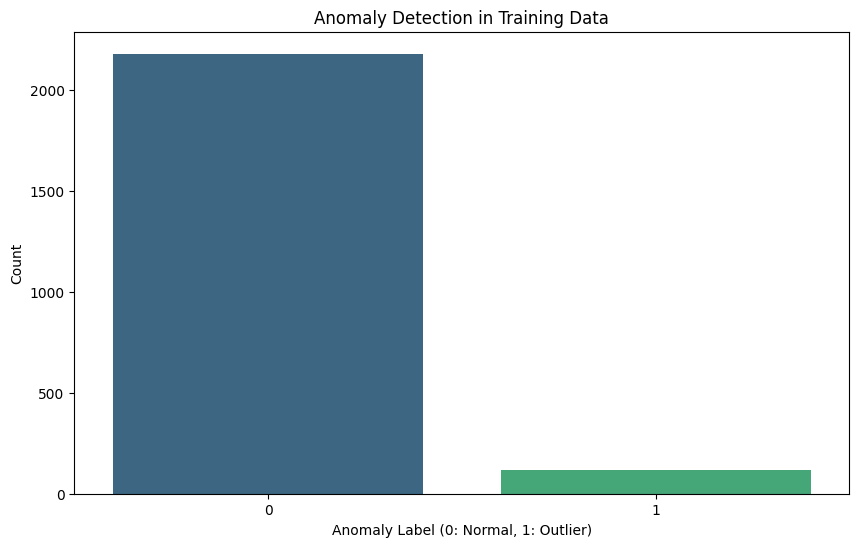

In [33]:
from sklearn.ensemble import IsolationForest

iso_model = IsolationForest(contamination=0.05, random_state=42).fit(X_train)
y_train_pred = iso_model.predict(X_train)
y_train_pred = pd.Series(y_train_pred, index=X_train.index)
y_train_pred = y_train_pred.map({1: 0, -1: 1})  # Convert to binary labels (0: normal, 1: outlier)
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train_pred, palette='viridis')
plt.title('Anomaly Detection in Training Data')
plt.xlabel('Anomaly Label (0: Normal, 1: Outlier)')
plt.ylabel('Count')
plt.show()


In [34]:
X_train_clean = X_train[y_train_pred == 0]
y_train_clean = y_train[y_train_pred == 0]

In [35]:
model_outlier = RandomForestClassifier(n_estimators=1000,
                                       max_depth=7, 
                                       min_samples_split=2, 
                                       min_samples_leaf=1, 
                                       random_state=42, class_weight='balanced')
model_outlier.fit(X_train_clean, y_train_clean)
y_pred_outlier = model_outlier.predict(X_test)
print("Accuracy after outlier removal:", accuracy_score(y_test, y_pred_outlier))

Accuracy after outlier removal: 0.6683621566632757


In [36]:
print(classification_report(y_test, y_pred_outlier))
print(confusion_matrix(y_test, y_pred_outlier))

              precision    recall  f1-score   support

           0       0.71      0.81      0.75       617
           1       0.57      0.43      0.49       366

    accuracy                           0.67       983
   macro avg       0.64      0.62      0.62       983
weighted avg       0.66      0.67      0.66       983

[[498 119]
 [207 159]]


<a id="5"></a>
## Hyperparameter Tuning

In [2]:
"""param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'class_weight': ['balanced']
}"""

"param_dist = {\n    'n_estimators': [100, 200, 300, 500],\n    'max_depth': [None, 10, 20, 30],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4],\n    'max_features': ['sqrt', 'log2'],\n    'bootstrap': [True, False],\n    'class_weight': ['balanced']\n}"

In [38]:
"""rf_grid_model = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                       param_grid=param_dist,
                       cv=10,
                       n_jobs=-1,
                       verbose=2,
                       scoring='f1').fit(X_train_clean, y_train_clean)"""

"rf_grid_model = GridSearchCV(estimator=RandomForestClassifier(random_state=42),\n                       param_grid=param_dist,\n                       cv=10,\n                       n_jobs=-1,\n                       verbose=2,\n                       scoring='f1').fit(X_train_clean, y_train_clean)"

In [39]:
"""rf_grid_model.best_params_"""

'rf_grid_model.best_params_'

In [40]:
"""rf_final = RandomForestClassifier(n_estimators=1000,
                                  max_depth=rf_grid_model.best_params_['max_depth'],
                                  min_samples_split=rf_grid_model.best_params_['min_samples_split'],
                                  min_samples_leaf=rf_grid_model.best_params_['min_samples_leaf'],
                                  class_weight=rf_grid_model.best_params_['class_weight'],
                                  random_state=42).fit(X_train_clean, y_train_clean)
y_pred_final = rf_final.predict(X_test)
print("Final Model Accuracy:", accuracy_score(y_test, y_pred_final))"""

'rf_final = RandomForestClassifier(n_estimators=1000,\n                                  max_depth=rf_grid_model.best_params_[\'max_depth\'],\n                                  min_samples_split=rf_grid_model.best_params_[\'min_samples_split\'],\n                                  min_samples_leaf=rf_grid_model.best_params_[\'min_samples_leaf\'],\n                                  class_weight=rf_grid_model.best_params_[\'class_weight\'],\n                                  random_state=42).fit(X_train_clean, y_train_clean)\ny_pred_final = rf_final.predict(X_test)\nprint("Final Model Accuracy:", accuracy_score(y_test, y_pred_final))'

In [41]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_clean, y_train_clean)

rf_smote = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train_smote, y_train_smote)

y_pred_smote = rf_smote.predict(X_test)
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73       617
           1       0.53      0.49      0.51       366

    accuracy                           0.65       983
   macro avg       0.62      0.62      0.62       983
weighted avg       0.65      0.65      0.65       983



In [42]:
probs = rf_smote.predict_proba(X_test)[:, 1]
y_pred_thresh = (probs > 0.45).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67       617
           1       0.50      0.66      0.57       366

    accuracy                           0.62       983
   macro avg       0.62      0.63      0.62       983
weighted avg       0.66      0.62      0.63       983



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11284\2588692222.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




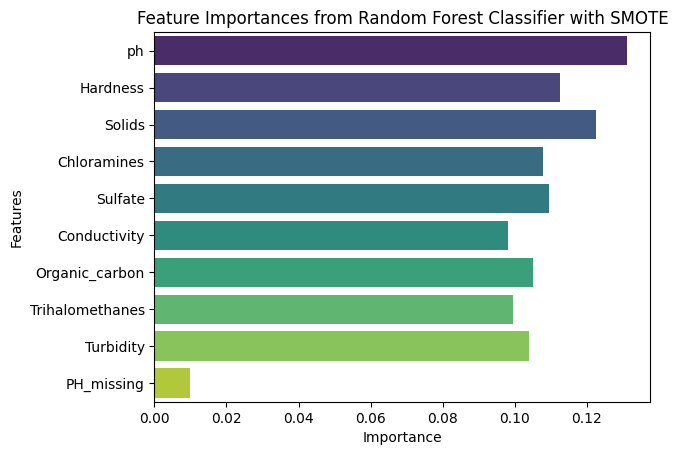

In [43]:
sns.barplot(x=rf_smote.feature_importances_, y=X_train_smote.columns, palette="viridis")
plt.title('Feature Importances from Random Forest Classifier with SMOTE')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

<a id="6"></a>
## RF modelling with PCA (UnSuccess)

Text(0, 0.5, 'Cumulative Explained Variance')

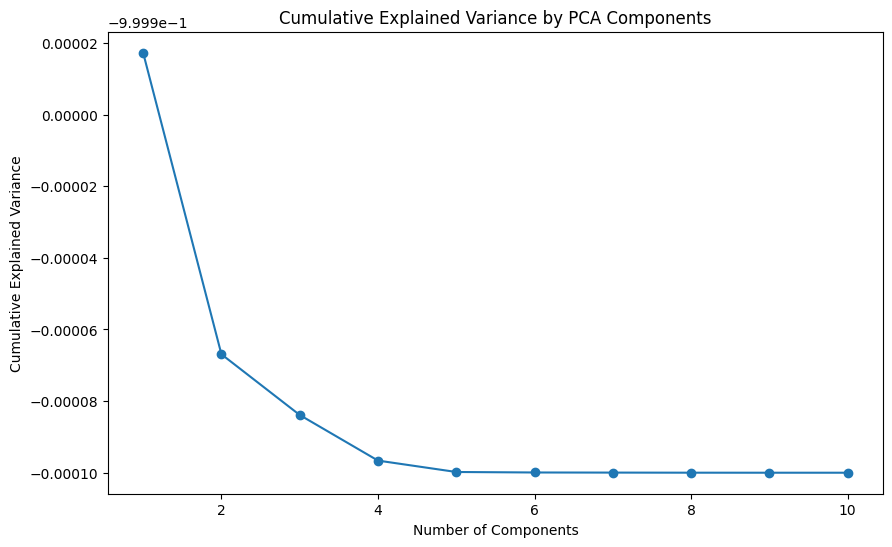

In [44]:
#PCA model
from sklearn.decomposition import PCA
pca = PCA(n_components=10, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# cumulative explained variance
explained_variance = np.cumsum(-pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [45]:
# 4 is the number of components that explains 99% of the variance

pca_final = PCA(n_components=4, random_state=42)
pca_final.fit(X_train)
X_train_pca = pca_final.transform(X_train)
X_test_pca = pca_final.transform(X_test)

rf_pca = RandomForestClassifier(n_estimators=1000,
                                       max_depth=7, 
                                       min_samples_split=2, 
                                       min_samples_leaf=1, 
                                       random_state=42, class_weight='balanced').fit(X_train_pca, y_train)
y_pred_pca = rf_pca.predict(X_test_pca)
print(classification_report(y_test, y_pred_pca))

              precision    recall  f1-score   support

           0       0.67      0.79      0.72       617
           1       0.49      0.35      0.41       366

    accuracy                           0.62       983
   macro avg       0.58      0.57      0.57       983
weighted avg       0.60      0.62      0.61       983



<a id="7"></a>
## Shapley Additive Explanations (SHAP) and Re-Modelling

In [46]:
#%pip install shap

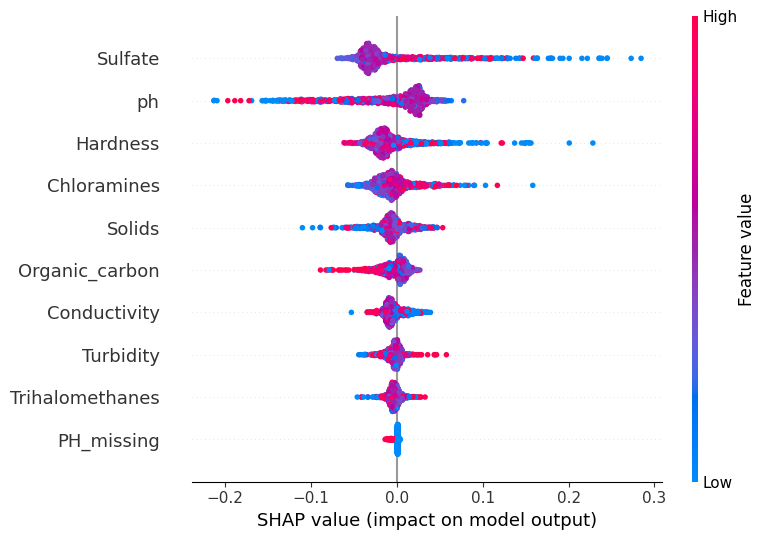

In [ ]:
import shap

explainer = shap.TreeExplainer(rfc_tuned)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[:, :, 1], X_test) # feature impact on values which chosen as 1 by model

This Plot shows us;

Sulfate is the most important variable.

Also ph is important but **pH alone is not a very strong signal for the model.**

Hardness and Chloramines shows middle effect

**If ph data is missing, it often increases not potable values.**

**so, ph_missing feature has benefit for model**

In [64]:
chosen_features = ["ph", "Sulfate", "Hardness", "Chloramines", "PH_missing"]

X_shap = df[chosen_features]
y = df["Potability"]

X_shap_train, X_shap_test, y_train, y_test = train_test_split(X_shap, y, test_size=0.3, random_state=42)

print(X_shap_train.shape)
print(X_shap_test.shape)
print(y_train.shape)
print(y_test.shape)

(2293, 5)
(983, 5)
(2293,)
(983,)


In [ ]:
RFC_shap_model = RandomForestClassifier(random_state=42).fit(X_shap_train, y_train)
y_pred = RFC_shap_model.predict(X_shap_test)
print(classification_report(y_test, y_pred))
print("accuracy_score: " , accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77       617
           1       0.62      0.42      0.50       366

    accuracy                           0.69       983
   macro avg       0.67      0.63      0.64       983
weighted avg       0.68      0.69      0.67       983

accuracy_score:  0.688708036622584


In [67]:
rfc_param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

In [68]:
rfc_shap_cv = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=rfc_param_grid,
                           scoring="f1",
                           cv=10,
                           n_jobs=-1,
                           verbose=2).fit(X_shap_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


In [73]:
print("Best params: ", rfc_shap_cv.best_params_)
print("Best F1 Score: ", rfc_shap_cv.best_score_)

Best params:  {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best F1 Score:  0.5252816362743964


In [71]:
rfc_shap_tuned = RandomForestClassifier(n_estimators=rfc_shap_cv.best_params_["n_estimators"],
                                        min_samples_split=rfc_shap_cv.best_params_["min_samples_split"],
                                        min_samples_leaf=rfc_shap_cv.best_params_["min_samples_leaf"],
                                        max_depth=rfc_shap_cv.best_params_["max_depth"],
                                        class_weight="balanced", random_state=42).fit(X_shap_train, y_train)

y_shap_pred = rfc_shap_tuned.predict(X_shap_test)
print(classification_report(y_test, y_shap_pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.75       617
           1       0.57      0.51      0.54       366

    accuracy                           0.67       983
   macro avg       0.65      0.64      0.64       983
weighted avg       0.67      0.67      0.67       983



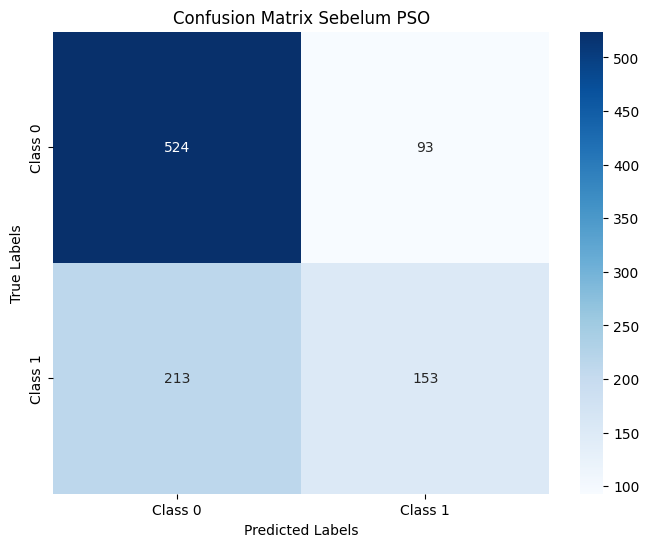

In [77]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix Sebelum PSO')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()